# Overview

Here, we simulate an algorithm for a potential, partially secure, multi private key cryptosystem. The algorithm is as follows:

1. Input a message, split into list of characters, and convert to ASCII values
2. Pass each ASCII data through the *Koblitz encoder*, to convert into $(x_0,y_0)$ pairs
3. Define a **private key** $(h,k)$ and perform $$(x_1,y_1)\to(x_0+h,y_0+k)$$
4. Define another **private key**, an integer $n$ such that $\theta=\dfrac{n\pi}2$ and generate the rotation matrix $$R=\left(\begin{array}{cc}\cos\theta &-\sin\theta\\ \sin\theta & \cos\theta\end{array}\right)$$
5. Perform $$(x_2,y_2)=R\left(\begin{array}{c}x_1\\y_1\end{array}\right)$$

6. For decrypting the data, perform $$(x_1,y_1)=R^{-1}\left(\begin{array}{c}x_2\\y_2\end{array}\right)$$
7. Revert back by undoing the change of axes transformation $$(x_0,y_0)\to(x_1-h,y_1-k)$$

8. Now that the points have been recovered, passing them through the *Koblitz decoder* function, outputs the original string.

First, we define the required modules and packages

In [1]:
import numpy as np
import math
from time import time
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def sq_root_mod_n(n, p):
    n = n % p
    for x in range(2, p):
        if ((x * x) % p == n):
            return x
    return 0

In [3]:
def koblitz_encoder(plainText, elliptic_a, elliptic_b):
    ord_lst = [ord(ch) for ch in plainText]
    k = 20
    p = 751

    x_coords = []
    y_coords = []
    encoded_points = []

    for m in ord_lst:
        for j in range(1, k):
            x_m = m * k + j
            n = pow(x_m, 3) + elliptic_a * x_m + elliptic_b
            y_m = sq_root_mod_n(n, p)
            if (y_m != 0):
                x_coords.append(x_m)
                y_coords.append(y_m)
                encoded_points.append([x_m, y_m])
                break

    encoded = []
    for i in range(len(x_coords)):
        encoded.append([x_coords[i], y_coords[i]])
        #print('{},{}'.format(x_coords[i], y_coords[i]))
    return encoded


def koblitz_decoder(encoded_points):
    decoded_Msg = []
    k = 20
    for i in range(len(encoded_points)):
        d = math.floor((encoded_points[i][0] - 1) / k)
        #print(type(d))
        decoded_Msg.append(abs(d))

    # print(''.join(decoded_Msg))
    return ''.join(map(lambda x: chr(x),decoded_Msg))

In [4]:
def encrypt(lst_pts,h,k,n):
    for i in range(len(lst_pts)):
        lst_pts[i][0]+=h
        lst_pts[i][1]+=k
    
    theta = n * np.pi / 2
    R = [[int(np.cos(theta)), int(-np.sin(theta))],
         [int(np.sin(theta)), int(np.cos(theta))]]
    
    for i in range(len(lst_pts)):
        lst_pts[i] = np.matmul(lst_pts[i], R)
        lst_pts[i] = lst_pts[i].tolist()

    return lst_pts

In [5]:
def decrypt(enc_pts,h,k,n):
    theta = n * np.pi / 2
    R = [[int(np.cos(theta)), int(-np.sin(theta))],
         [int(np.sin(theta)), int(np.cos(theta))]]
    
    p=[]
    for i in range(len(enc_pts)):
        p.append(np.matmul(np.linalg.inv(R), enc_pts[i]).tolist())
    
    for i in range(len(p)):
        p[i][0] -= h
        p[i][1] -= k
        #p[i]=p[i].tolist()
        
    return p

In [6]:
#msg=input("Enter a message: ")
msg="abcdefghijklmnopqrstuvwxyz"
# a,b=map(int,input("\nEnter elliptic curve parameters (a,b): ").split())
# h,k=map(int,input("\nEnter change of axes parameters (h,k): ").split())
# n=int(input("\nEnter an integer to generate angle of rotation matrix: "))

a,b,h,k,n=5,7,3,4,1

count=0

print("String length\tTime Elapsed\n----------------------------")
while count<4:
    t=time()
    enc=koblitz_encoder(msg,a,b)
    #t1=time()-t
    #print("\nEncoded:\n{}".format(enc))
    #print("\nTime elapsed: {}".format(t1))

    #t=time()
    encrypted_data=encrypt(enc,h,k,n)
    #t1=time()-t
    #print("\nEncrypted message:\n{}".format(encrypted_data))
    #print("\nTime elapsed: {}".format(t1))

    #t=time()
    decrypted_data=decrypt(encrypted_data,h,k,n)
    #t1=time()-t
    #print("\nDecrypted message:\n{}".format(decrypted_data))
    #print("\nTime elapsedL {}".format(t1))

    #t=time()
    dec=koblitz_decoder(decrypted_data)
    t1=time()-t
    #print("\nDecoded message:\n{}".format(dec))
    #print("\nTime elapsed: {}".format(t1))
    print("{}\t\t  {:.5f}".format(len(msg),t1))
    
    count+=1
    msg=msg*10

String length	Time Elapsed
----------------------------
26		  0.00281
260		  0.02543
2600		  0.23734
26000		  2.54921


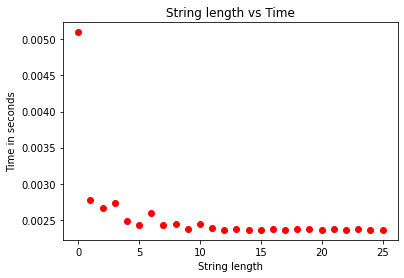

In [7]:
#msg=input("Enter a message: ")
msg="abcdefghijklmnopqrstuvwxyz"
# a,b=map(int,input("\nEnter elliptic curve parameters (a,b): ").split())
# h,k=map(int,input("\nEnter change of axes parameters (h,k): ").split())
# n=int(input("\nEnter an integer to generate angle of rotation matrix: "))

a,b,h,k,n=5,7,3,4,1

count=0
t_=[]
#print("String length\tTime Elapsed\n----------------------------")
for i in range(0,len(msg)):
    t=time()
    enc=koblitz_encoder(msg,a,b)
    #t1=time()-t
    #print("\nEncoded:\n{}".format(enc))
    #print("\nTime elapsed: {}".format(t1))

    #t=time()
    encrypted_data=encrypt(enc,h,k,n)
    #t1=time()-t
    #print("\nEncrypted message:\n{}".format(encrypted_data))
    #print("\nTime elapsed: {}".format(t1))

    #t=time()
    decrypted_data=decrypt(encrypted_data,h,k,n)
    #t1=time()-t
    #print("\nDecrypted message:\n{}".format(decrypted_data))
    #print("\nTime elapsedL {}".format(t1))

    #t=time()
    dec=koblitz_decoder(decrypted_data)
    t1=time()-t
    
    t_.append(t1)
    #print("\nDecoded message:\n{}".format(dec))
    #print("\nTime elapsed: {}".format(t1))
    #print("{}\t\t  {:.5f}".format(i,t1))

x=np.arange(len(msg))
y=t_
plt.xlabel('String length')
plt.ylabel('Time in seconds')
plt.title('String length vs Time')
plt.plot(x,y,'ro')
plt.savefig('strlen vs time.png')

In [8]:
msg="Hello"

r = 10
success=0
for a in range(-r,r):
    for b in range(-r,r):
        for h in range(-r,r):
            for k in range(-r,r):
                for n in range(4):
                    enc=koblitz_encoder(msg,a,b)

                    encrypted_data=encrypt(enc,h,k,n)

                    decrypted_data=decrypt(encrypted_data,h,k,n)

                    dec=koblitz_decoder(decrypted_data)

                    if dec==msg:
                        success+=1

print("Total trials: {}\nSuccessful trials: {}\nPercentage of successful trials: {}".format(4*(2*r+1)**4,success,(success/(4*(2*r+1)**4))*100))                    

Total trials: 777924
Successful trials: 455440
Percentage of successful trials: 58.5455648623773


With fixed $n=0,1,2,3$, and varying $(a,b,h,k)$ the following results were obtained

In [9]:
msg="Hello"
n=0
r = 10
success=0
for a in range(-r,r):
    for b in range(-r,r):
        for h in range(-r,r):
            for k in range(-r,r):
                enc=koblitz_encoder(msg,a,b)
                
                encrypted_data=encrypt(enc,h,k,n)
                
                decrypted_data=decrypt(encrypted_data,h,k,n)
                
                dec=koblitz_decoder(decrypted_data)
                
                if dec==msg:
                    success+=1

print("Total trials: {}\nSuccessful trials: {}\nPercentage of successful trials: {}".format((2*r+1)**4,success,(success/((2*r+1)**4))*100))

msg="Hello"
n=1
r = 10
success=0
for a in range(-r,r):
    for b in range(-r,r):
        for h in range(-r,r):
            for k in range(-r,r):
                enc=koblitz_encoder(msg,a,b)
                
                encrypted_data=encrypt(enc,h,k,n)
                
                decrypted_data=decrypt(encrypted_data,h,k,n)
                
                dec=koblitz_decoder(decrypted_data)
                
                if dec==msg:
                    success+=1

print("Total trials: {}\nSuccessful trials: {}\nPercentage of successful trials: {}".format((2*r+1)**4,success,(success/((2*r+1)**4))*100))

msg="Hello"
n=2
r = 10
success=0
for a in range(-r,r):
    for b in range(-r,r):
        for h in range(-r,r):
            for k in range(-r,r):
                enc=koblitz_encoder(msg,a,b)
                
                encrypted_data=encrypt(enc,h,k,n)
                
                decrypted_data=decrypt(encrypted_data,h,k,n)
                
                dec=koblitz_decoder(decrypted_data)
                
                if dec==msg:
                    success+=1

print("Total trials: {}\nSuccessful trials: {}\nPercentage of successful trials: {}".format((2*r+1)**4,success,(success/((2*r+1)**4))*100))

msg="Hello"
n=3
r = 10
success=0
for a in range(-r,r):
    for b in range(-r,r):
        for h in range(-r,r):
            for k in range(-r,r):
                enc=koblitz_encoder(msg,a,b)
                
                encrypted_data=encrypt(enc,h,k,n)
                
                decrypted_data=decrypt(encrypted_data,h,k,n)
                
                dec=koblitz_decoder(decrypted_data)
                
                if dec==msg:
                    success+=1

print("Total trials: {}\nSuccessful trials: {}\nPercentage of successful trials: {}".format((2*r+1)**4,success,(success/((2*r+1)**4))*100))


Total trials: 194481
Successful trials: 160000
Percentage of successful trials: 82.2702474791882
Total trials: 194481
Successful trials: 67720
Percentage of successful trials: 34.8208822455664
Total trials: 194481
Successful trials: 160000
Percentage of successful trials: 82.2702474791882
Total trials: 194481
Successful trials: 67720
Percentage of successful trials: 34.8208822455664


It is seen that when $n\in\left\{0,2\right\}$, i.e. $0^{\circ}$ or $360^{\circ}$, and $270^{\circ}$ generates the maximum successful decryption.